<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/example_notebooks/1_gluoncv_finetune/TRAIN-gluon-ssd_512_resnet50_v1_coco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/1_gluoncv_finetune/installation
     
 - Select the right requirements file and run
 
     - cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/1_gluoncv_finetune/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install


# For Local systems and cloud select the right CUDA version
# !cd Monk_Object_Detection/1_gluoncv_finetune/installation && cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

## Dataset Directory Structure

    Parent_Directory (root)
          |
          |-----------Images (img_dir)
          |              |
          |              |------------------img1.jpg
          |              |------------------img2.jpg
          |              |------------------.........(and so on)
          |
          |
          |-----------train_labels.csv (anno_file)
          
          
## Annotation file format

           | Id         | Labels                                 |
           | img1.jpg   | x1 y1 x2 y2 label1 x1 y1 x2 y2 label2  |
           
- Labels:  xmin ymin xmax ymax label
- xmin, ymin - top left corner of bounding box
- xmax, ymax - bottom right corner of bounding box

# About the Network

1. Blog 1 on Resnet Network - https://medium.com/@14prakash/understanding-and-implementing-architectures-of-resnet-and-resnext-for-state-of-the-art-image-cf51669e1624

2. Blog 2 on Resnet Network - https://neurohive.io/en/popular-networks/resnet/

3. Blog 3 on Resnet Network - https://cv-tricks.com/keras/understand-implement-resnets/

4. Blog 4 on Redisual blocks - https://d2l.ai/chapter_convolutional-modern/resnet.html

5. Blog 1 on SSD - https://towardsdatascience.com/review-ssd-single-shot-detector-object-detection-851a94607d11

6. Blog 2 on SSD-512 - https://medium.com/@jonathan_hui/ssd-object-detection-single-shot-multibox-detector-for-real-time-processing-9bd8deac0e06

7. Blog 3 on SSD - https://towardsdatascience.com/understanding-ssd-multibox-real-time-object-detection-in-deep-learning-495ef744fab

8. Reference Tutorial - https://gluon.mxnet.io/chapter08_computer-vision/object-detection.html

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/1_gluoncv_finetune/lib/");

In [2]:
from detector_prototype import Detector

In [3]:
gtf = Detector();

# Sample Dataset Credits

- credits: https://github.com/experiencor/kangaroo

In [4]:
root = "Monk_Object_Detection/example_notebooks/sample_dataset/kangaroo/";                         
img_dir = "Images/";                                                     
anno_file = "train_labels.csv";
batch_size=2;

In [5]:
gtf.Dataset(root, img_dir, anno_file, batch_size=batch_size);

In [6]:
pretrained = True;         
gpu=True;
model_name = "ssd_512_resnet50_v1_coco";  

In [7]:
gtf.Model(model_name, use_pretrained=pretrained, use_gpu=gpu);

/home/abhi/.virtualenvs/monk_obj_1_gluoncv_finetune/lib/python3.6/site-packages/mxnet/gluon/block.py:1159: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


In [8]:
gtf.Set_Learning_Rate(0.001);

In [9]:
epochs=10;
params_file = "saved_model.params";

In [10]:
gtf.Train(epochs, params_file);

[Epoch 0][Batch 0], Speed: 0.189 samples/sec, CrossEntropy=7.503, SmoothL1=0.921
[Epoch 0][Batch 20], Speed: 8.910 samples/sec, CrossEntropy=4.513, SmoothL1=1.055
[Epoch 0][Batch 40], Speed: 12.534 samples/sec, CrossEntropy=3.713, SmoothL1=1.164
[Epoch 0][Batch 60], Speed: 10.976 samples/sec, CrossEntropy=3.435, SmoothL1=1.352
[Epoch 0][Batch 80], Speed: 5.459 samples/sec, CrossEntropy=3.372, SmoothL1=1.384
[Epoch 1][Batch 0], Speed: 7.053 samples/sec, CrossEntropy=2.909, SmoothL1=1.504
[Epoch 1][Batch 20], Speed: 6.098 samples/sec, CrossEntropy=2.612, SmoothL1=1.293
[Epoch 1][Batch 40], Speed: 11.457 samples/sec, CrossEntropy=2.504, SmoothL1=1.172
[Epoch 1][Batch 60], Speed: 11.869 samples/sec, CrossEntropy=2.504, SmoothL1=1.213
[Epoch 1][Batch 80], Speed: 11.114 samples/sec, CrossEntropy=2.500, SmoothL1=1.174
[Epoch 2][Batch 0], Speed: 9.445 samples/sec, CrossEntropy=2.158, SmoothL1=1.035
[Epoch 2][Batch 20], Speed: 12.035 samples/sec, CrossEntropy=2.367, SmoothL1=1.032
[Epoch 2][Bat

# Running Inference

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/1_gluoncv_finetune/lib/");

In [11]:
from inference_prototype import Infer

In [12]:
model_name = "ssd_512_resnet50_v1_coco";
params_file = "saved_model.params";
class_list = ["kangaroo"];

In [13]:
gtf = Infer(model_name, params_file, class_list, use_gpu=True);

In [14]:
img_name = "Monk_Object_Detection/example_notebooks/sample_dataset/kangaroo/test/kg4.jpeg"; 
visualize = True;
thresh = 0.9;

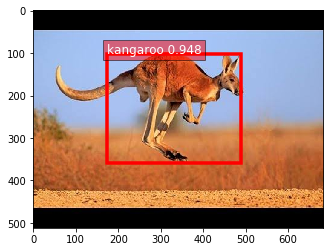

In [15]:
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

# Author - Tessellate Imaging - https://www.tessellateimaging.com/

# Monk Library - https://github.com/Tessellate-Imaging/monk_v1

    Monk is an opensource low-code tool for computer vision and deep learning


## Monk features
   - low-code
   - unified wrapper over major deep learning framework - keras, pytorch, gluoncv
   - syntax invariant wrapper

## Enables

    - to create, manage and version control deep learning experiments
    - to compare experiments across training metrics
    - to quickly find best hyper-parameters

## At present it only supports transfer learning, but we are working each day to incorporate

    - GUI based custom model creation
    - various object detection and segmentation algorithms
    - deployment pipelines to cloud and local platforms
    - acceleration libraries such as TensorRT
    - preprocessing and post processing libraries


## To contribute to Monk AI or Monk Object Detection repository raise an issue in the git-repo or dm us on linkedin

    - Abhishek - https://www.linkedin.com/in/abhishek-kumar-annamraju/
    - Akash - https://www.linkedin.com/in/akashdeepsingh01/

